## Parsing data from keyboard log file

1. Import log_parser module
2. Call parse_keyboard_log(filepath), filepath = path to log file
3. Store result in a variable (type: Pandas DataFrame)

#### Retrieving a certain time interval from parsed data

1. Call get_segment(parsedData, index, seg_length) <br/>
    parsedData = data returned from parse_keyboard_log() <br/>
    index = which data segment to retrieve (of seg_length) <br/>
    seg_length = length of segment (time interval in seconds, default 60s) <br/>
2. Store result in a variable (type: Pandas DataFrame)

In [1]:
import log_parser

keyboard_data = log_parser.parse_keyboard_log("keylogs/jonathan/keyboard.log")
print(keyboard_data)

# Get 5th 30s segment from data
keyboard_data_segment = log_parser.get_segment(keyboard_data, index=2, seg_length=10)
print(keyboard_data_segment)

FileNotFoundError: [Errno 2] No such file or directory: 'keylogs/jonathan/keyboard.log'

## Parsing data from mouse log file

1. Import log_parser module
2. Call parse_mouse_log(filepath), filepath = path to log file
3. Store result in a variable (type: Pandas DataFrame)

#### Retrieving a certain time interval from parsed data

1. Call get_segment(parsedData, index, seg_length) <br/>
    parsedData = data returned from parse_keyboard_log() <br/>
    index = which data segment to retrieve (of seg_length) <br/>
    seg_length = length of segment (time interval in seconds, default 60s) <br/>
2. Store result in a variable (type: Pandas DataFrame)

In [ ]:
import log_parser

mouse_data = log_parser.parse_mouse_log("mouselogs/jonathan/mouse.log")
print(mouse_data)

# Get 5th 30s segment from data
mouse_data_segment = log_parser.get_segment(mouse_data, index=5, seg_length=30)
print(mouse_data_segment)

             time     x    y button   action  class
0          1.3364   943  515   None     None    NaN
1          1.4306   947  514   None     None    NaN
2          1.6931   948  514   None     None    NaN
3          1.6951   949  514   None     None    NaN
4          1.6962   950  514   None     None    NaN
...           ...   ...  ...    ...      ...    ...
354768  1303.4239  1170  515   None     None    NaN
354769  1303.4299  1171  515   None     None    NaN
354770  1303.4409  1172  515   None     None    NaN
354771  1303.4418  1172  514   None     None    NaN
354772  1304.4521  1172  514   left  pressed    NaN

[354773 rows x 6 columns]
           time    x    y button action  class
50043  150.0009  613  384   None   None    NaN
50044  150.0018  609  384   None   None    NaN
50045  150.0028  606  384   None   None    NaN
50046  150.0038  601  384   None   None    NaN
50047  150.0049  599  384   None   None    NaN
...         ...  ...  ...    ...    ...    ...
54854  177.7537  643

## Example usage of keyboard_heatmap module

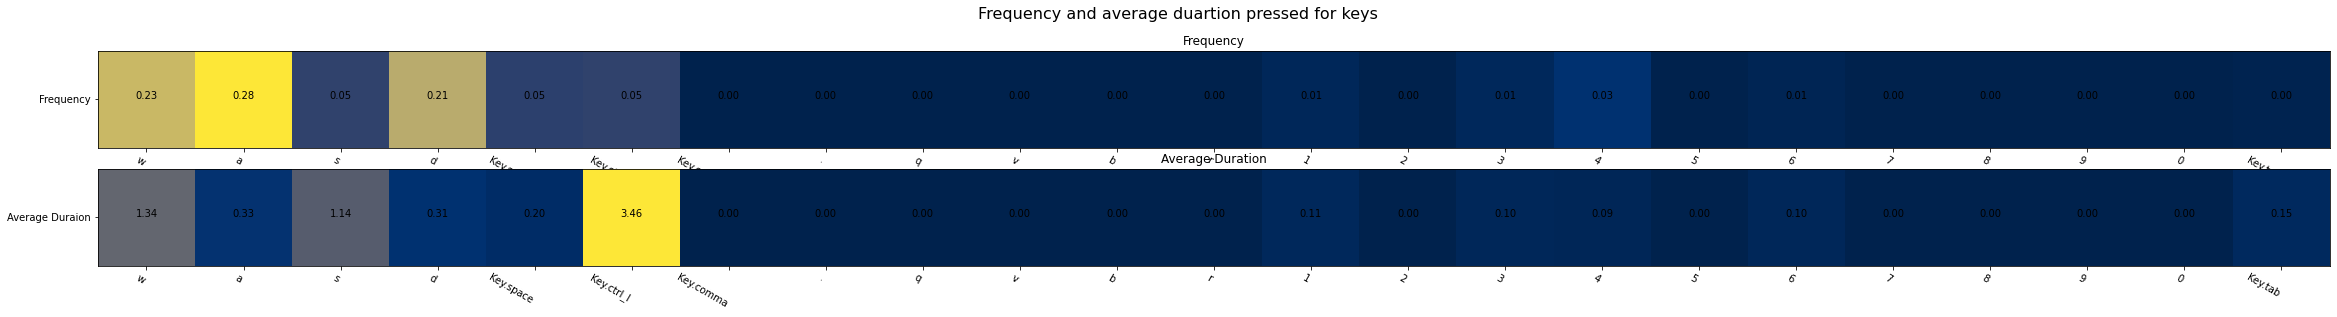

In [5]:
# Import log parser and mouse heatmap modules
from log_parser import parse_keyboard_log
from keyboard_heatmap import KeyboardHeatmap

# Generate the dataframe from log file
keyboard_data = parse_keyboard_log("logs/JON/SPY/key.log")

# Create a heatmap from the first 10 minutes of log data
heatmap = KeyboardHeatmap(keyboard_data, 0, seg_length=600)

# Show the segment as an infographic
heatmap.show_infographic()

# Show the segment as a heatmap
heatmap.show_heatmap()

## Example usage of mouse_heatmap module

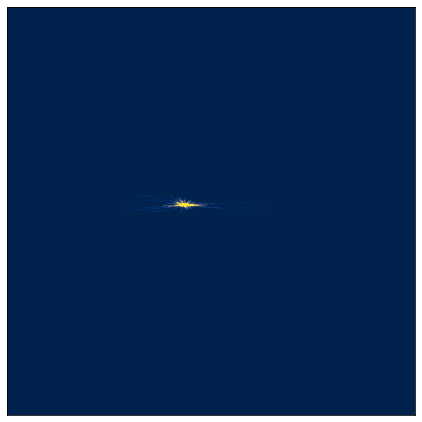

In [ ]:
# Import log parser and mouse heatmap modules
from log_parser import parse_mouse_log
from mouse_heatmap import MouseHeatmap

# Generate the dataframe from log file
mouse_data = parse_mouse_log("logs/ZIR/SOL/mouse.log")

# Create a heatmap from the 4th minute of log data
heatmap = MouseHeatmap(mouse_data, 3, seg_length=60)

# Show the segment as a 10x10 heatmap
heatmap.show_heatmap(res=(500, 500))